# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

# Инструменты
Matplotlib  
Pandas  
Scikit-learn
seaborn
numpy

# Цель проекта

Построить модель с предельно большим значением F1-меры. (но не менее 0.59). Дополнительно измерить AUC-ROC, сравнивить её значение с F1-мерой.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Загружаем-датасет" data-toc-modified-id="Загружаем-датасет-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загружаем датасет</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Работа-с-аномалиями" data-toc-modified-id="Работа-с-аномалиями-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с аномалиями</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Построим-классификатор-без-учёта-дисбаланса-классов" data-toc-modified-id="Построим-классификатор-без-учёта-дисбаланса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Построим классификатор без учёта дисбаланса классов</a></span></li><li><span><a href="#Подберём-модель-с-хорошей-метрикой-F1" data-toc-modified-id="Подберём-модель-с-хорошей-метрикой-F1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подберём модель с хорошей метрикой F1</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-со-взвешиванием-классов" data-toc-modified-id="Обучение-модели-со-взвешиванием-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели со взвешиванием классов</a></span></li><li><span><a href="#Применим-увеличение-выборки" data-toc-modified-id="Применим-увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Применим увеличение выборки</a></span></li><li><span><a href="#Применим-уменьшение-выборки" data-toc-modified-id="Применим-уменьшение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Применим уменьшение выборки</a></span></li><li><span><a href="#Оптимизация-гипер-параметров" data-toc-modified-id="Оптимизация-гипер-параметров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оптимизация гипер-параметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

In [1]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn. metrics import classification_report
from sklearn.metrics import roc_curve 
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

## Загружаем датасет

In [2]:
df=pd.read_csv('E:/Data/_Projects/datasets/Churn.csv') #- использовать при работе на платформе 
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Изучим структуру наших данных

In [3]:
df.shape

(10001, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      10001 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10001 non-null  object 
 6   Age              10001 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  int64  
 11  IsActiveMember   10001 non-null  int64  
 12  EstimatedSalary  10001 non-null  float64
 13  Exited           10001 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Работа с пропусками

In [5]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             910
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

*Обнаружены пропуски в толбце, с количестовм лет, которое человек является клиентом банка. И их таких около 9% датасета. Посмотрим на них по-ближе*

In [6]:
df[df.isna().any(axis=1)].head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


*Видно что у клиентов которые с банком непонятно сколько лет имеются активные продукты. Бывают даже ненулевые балансы*

In [7]:
print(df['Tenure'].value_counts(ascending=True))
df[df['Tenure']==0].head(10)

0.0     382
10.0    446
6.0     881
9.0     882
4.0     885
7.0     925
5.0     927
3.0     928
8.0     933
2.0     950
1.0     952
Name: Tenure, dtype: int64


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
149,150,15794413,Harris,416,France,Male,32,0.0,0.00,2,0,1,878.87,0
164,165,15658929,Taverner,683,Spain,Male,29,0.0,133702.89,1,1,0,55582.54,1
176,177,15645248,Ho,510,France,Female,30,0.0,0.00,2,1,1,130553.47,0
187,188,15708710,Ford,525,Spain,Female,37,0.0,0.00,1,0,1,131521.72,0
231,232,15627000,Freeman,610,France,Male,40,0.0,0.00,2,1,0,62232.60,0


Мы увидели, что клиентов, которые с банком менее 1 года очень мало, что несколько странно, это значило бы, что банк почти не привлекает новых клиентов. При этом в условии сказано, что проблема не с привлечением новых, а с удержанием старых. Заменим все пустые значение "Tenure" на ноль.

In [8]:
df=df.dropna(0)
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Работа с аномалиями

Проверим как заполнены категориальные переменные

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 22, 30, 28,
       65, 52, 48, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68, 75,
       23, 60, 63, 64, 70, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 81, 78,
       92, 83], dtype=int64)

In [12]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

**Аномалий не обнаружено**

Теперь посмотрим диапазоны количественных факторов

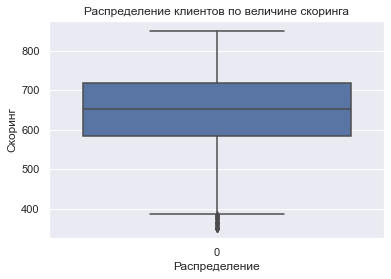

Всего аномально-низких скорингов:  17


In [13]:
sns.set(style="darkgrid")
chart=sns.boxplot(data=df['CreditScore'])
chart.set(xlabel ="Распределение", ylabel = "Скоринг", title ='Распределение клиентов по величине скоринга')
plt.show()
print("Всего аномально-низких скорингов: ", df[df['CreditScore']<400].count()[1])

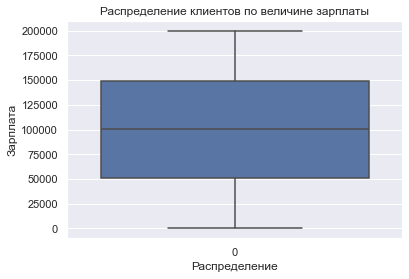

Всего аномально-высоких зарплат:  1152
Всего аномально-низких зарплат:  1123


In [16]:
sns.set(style="darkgrid")
chart=sns.boxplot(data=df['EstimatedSalary'])
chart.set(xlabel ="Распределение", ylabel = "Зарплата", title ='Распределение клиентов по величине зарплаты')
plt.show()
print("Всего аномально-высоких зарплат: ", df[df['EstimatedSalary']>175000].count()[1])
print("Всего аномально-низких зарплат: ", df[df['EstimatedSalary']<25000].count()[1])

In [17]:
df[df['EstimatedSalary']<2000].count()

RowNumber          101
CustomerId         101
Surname            101
CreditScore        101
Geography          101
Gender             101
Age                101
Tenure             101
Balance            101
NumOfProducts      101
HasCrCard          101
IsActiveMember     101
EstimatedSalary    101
Exited             101
dtype: int64

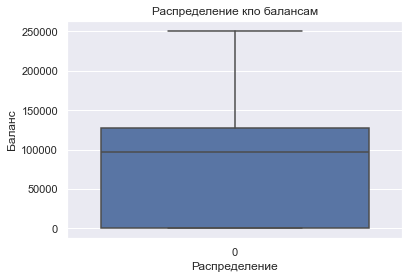

Всего аномально-высоких балансов:  30


In [19]:
sns.set(style="darkgrid")
chart=sns.boxplot(data=df['Balance'])
chart.set(xlabel ="Распределение", ylabel = "Баланс", title ='Распределение кпо балансам')
plt.show()
print("Всего аномально-высоких балансов: ", df[df['Balance']>200000].count()[1])

**Итак, нам удалось выяснить, что выбросов не так уж и много. 17 экстра-низких скорингов, - вообще не существенно для нашего исследования. Аномально высоких балансов - 30 - тоже можно пожертвовать не без ущерба для выводов. А вот с зарплатами сложнее. Есть несколько аномально высоких и аномально низких, и по графику их не так и мало. Да и значение фактора зарплат скорее всего будет иметь существенный вес для нашей модели ухода клиента. Так что зарпалты пока оставим, а от остальных маленьких аномалий избавимся.**

In [20]:
df=df[df['CreditScore']>400]
df=df[df['Balance']<200000]

Теперь рассмотрим как распределен целевой признак

In [21]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [22]:
df['Exited'].value_counts()

0    7224
1    1820
Name: Exited, dtype: int64

In [23]:
disbalance=7948/1999
disbalance

3.9759879939969984

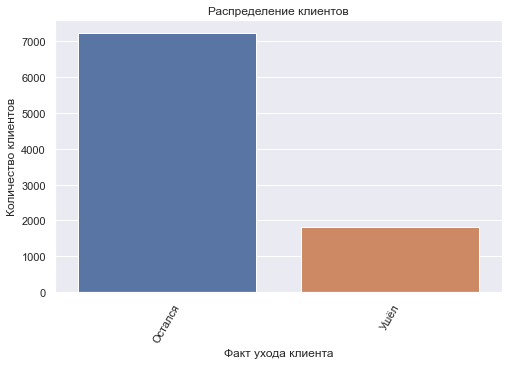

In [25]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Exited', data= df, order= df['Exited'].value_counts().index)
 
# Show the plot
plt.title('Распределение клиентов')
plt.xlabel('Факт ухода клиента')
plt.xticks([0,1],['Остался', 'Ушёл'])
plt.ylabel('Количество клиентов')
plt.show()

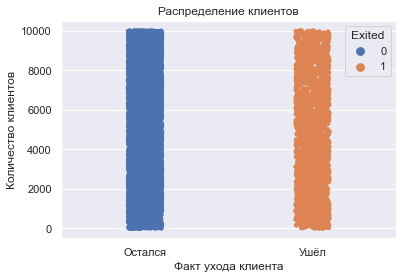

In [34]:
y=df.index
sns.stripplot(data=df, x="Exited", y=y,hue="Exited")
plt.title('Распределение клиентов')
plt.xlabel('Факт ухода клиента')
plt.xticks([0,1],['Остался', 'Ушёл'])
plt.ylabel('Количество клиентов')
plt.show()

# Вывод:
Данные достаточно хорошего качества. Пропусков было всего 9% в одном столбце и мы их устранили. Аномали также было выявлено немного - в части скорингов и балансов - мы от них избавились. По зарплатам - оставили, так как они не такие выраженные и их значение для моделии скорее всего крайне высокое. Соотношение классов конечно неравнозначеное - почти 8 к 2, что может скзаться на качестве модели. При этом 0 и 1 целевого значения распределены по датасету равномерно, без гиперскоплений в каком-то одном месте и без больших "разряженных" областей.

## Исследование задачи

### Построим классификатор без учёта дисбаланса классов

In [35]:
#Выкинем столбцы которые не будут участвовать в моделировании, так как не несут экномического смысла

In [36]:
df=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [37]:
#Проведём кодирование категориальных признаков через One-Hot-Encoding
df=pd.get_dummies(data=df, columns=["Geography","Gender"], drop_first=True)

df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [38]:
#Подготовим наборы данных для обучения и тестирования модели
target = df['Exited']
features = df.drop('Exited', axis=1)
features_s, features_test, target_s, target_test = train_test_split(features, target, test_size=0.2, random_state=123)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_s, target_s, test_size=0.25, random_state=12345)

In [39]:
print(features_train.shape,"-обучающая выборка")
print(features_test.shape,"-тестовая выборка")
print(features_valid.shape,"-валидационная выборка")

(5426, 11) -обучающая выборка
(1809, 11) -тестовая выборка
(1809, 11) -валидационная выборка


In [40]:
dfc=pd.DataFrame()
dfc['Train']=target_train.value_counts(normalize=True)
dfc['Test']=target_test.value_counts(normalize=True)
dfc['Valid']=target_valid.value_counts(normalize=True)
print("Состав выборок по целевому признаку")
dfc

Состав выборок по целевому признаку


,Train,Test,Valid
0,0.797641,0.79602,0.804865
1,0.202359,0.20398,0.195135


In [41]:
#Построим и обучим несколько моделей
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(probability=True),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

Напишем процедуру, обучающую модели по предложенным выборкам, и сразу же считал статистику по всем.

In [42]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        probabilities = classifier.predict_proba(X_test)
        probabilities_one_valid = probabilities[:, 1]
        predictions=classifier.predict(X_test)
        t_end = time.perf_counter()
        
        t_diff = t_end - t_start
        f1_= f1_score(Y_test, predictions)
        roc_auc_ = roc_auc_score(Y_test, probabilities_one_valid)
        
        dict_models[classifier_name] = {'model': classifier, 'F1-score': f1_, 'roc_auc_score': roc_auc_, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

Добавим процедуру, которая красиво будет выводить получившуюся статистику

In [43]:
def display_dict_models(dict_models, sort_by='F1-score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['F1-score'] for key in cls]
    training_s = [dict_models[key]['roc_auc_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'F1-score', 'roc_auc_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'F1-score'] = training_s[ii]
        df_.loc[ii, 'roc_auc_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

### Подберём модель с хорошей метрикой F1

In [44]:
dict_models = batch_classify(features_train, target_train, features_valid, target_valid, no_classifiers = 8)
display_dict_models(dict_models)

trained Logistic Regression in 0.03 s
trained Nearest Neighbors in 0.03 s
trained Linear SVM in 1.72 s
trained Gradient Boosting Classifier in 5.78 s
trained Decision Tree in 0.02 s
trained Random Forest in 5.25 s
trained Neural Net in 0.43 s
trained Naive Bayes in 0.00 s


,classifier,F1-score,roc_auc_score,train_time
5,Random Forest,0.851872,0.565836,5.245865
3,Gradient Boosting Classifier,0.834235,0.560000,5.779603
7,Naive Bayes,0.749558,0.084507,0.003197
4,Decision Tree,0.692200,0.501377,0.016168
0,Logistic Regression,0.664604,0.097087,0.031516
1,Nearest Neighbors,0.547081,0.109015,0.033599
6,Neural Net,0.495988,0.000000,0.427451
2,Linear SVM,0.464873,0.000000,1.718917


**Вывод**
Нам удалось посчитать сразу несколько моделей с неплохим F1, больше целевого 0,59. Чемпионом, как несложно было догадаться, является модель случайного леса, которая традиционно хорошо справляется с таким классом задач. Но метрика ROC-AUC у неё лишь немногим превосходит 0,5 - характерную для случайной модели. Резюмируем: без учёта дисбаланса классов нормальную модель не построить.

**Окончательно понять как именно ошибается модель нам поможит Comfusion Matrix

In [45]:
#Сначала напишем функцию для вывода матрицы
def Show_cf(X_train, Y_train, X_test, Y_test, model):
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['0', '1'])
    sns.set(style="dark")
    disp.plot()
    plt.show()


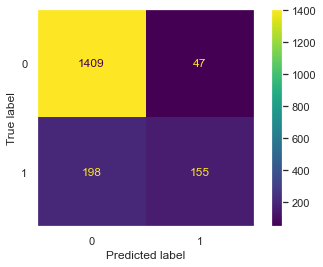

In [46]:
model=RandomForestClassifier(n_estimators=1000)
Show_cf(features_train, target_train, features_valid, target_valid,model)

**Вывод:**
Мы видим, что меньше половины единичек оцениваются верно, с 0 почти нет ошибок. Модель научилась хорошо определять когда клиента лоялен банку и не хочет уходить, а вот более половины тех, кто уже собрался покинуть банк, она ошибочно записывает в "Лояльные". Но для бизнеса такая точность, конечно оставляет желать лучшего.

## Борьба с дисбалансом

### Обучение модели со взвешиванием классов

trained Random Forest - balanced in 5.65 s


,classifier,F1-score,roc_auc_score,train_time
0,Random Forest - balanced,0.850702,0.531365,5.653108


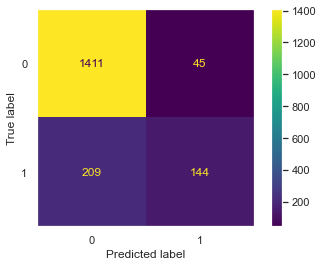

In [47]:
dict_classifiers = {
    "Random Forest - balanced": RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=12345),
}
dict_models = batch_classify(features_train, target_train, features_valid, target_valid, no_classifiers = 1)
display_dict_models(dict_models)

Show_cf(features_train, target_train, features_valid, target_valid,dict_classifiers["Random Forest - balanced"])

**Вывод:**

Применение весов к классам не дало заметного улучшения. ROC-AUC даже снизился, и количество 1 определённых как 0 только увеличилось.


### Применим увеличение выборки

In [48]:
#Сделаем функцию которая увеличивает выборку
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [49]:
dict_classifiers = {
    "Random Forest - sampled": RandomForestClassifier(n_estimators=1000, random_state=12345),
}
features_upsampled, target_upsampled = upsample(features_train, target_train, round(disbalance))

In [50]:
dict_models = batch_classify(features_upsampled, target_upsampled, features_valid, target_valid, no_classifiers = 1)

trained Random Forest - sampled in 7.51 s


,classifier,F1-score,roc_auc_score,train_time
0,Random Forest - sampled,0.847258,0.613251,7.510295


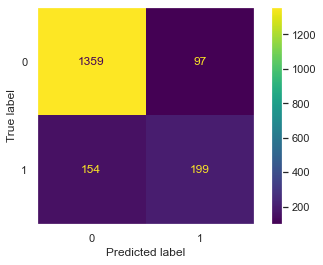

In [51]:
display_dict_models(dict_models)

Show_cf(features_upsampled, target_upsampled, features_valid, target_valid,dict_classifiers["Random Forest - sampled"])

**Вывод**
Метрики модели улучшились, и ROC-AUC уже 0.613 - налицо отрыв от 0.5, характерного для случайной модели. Да и количество верно предсказанных единиц стало больше чем число ошибочных предсказаний по единицам.

### Применим уменьшение выборки

In [52]:
#Напишем процедуру
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [53]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 1/disbalance)

trained Random Forest - sampled in 2.63 s


,classifier,F1-score,roc_auc_score,train_time
0,Random Forest - sampled,0.847514,0.576674,2.630118


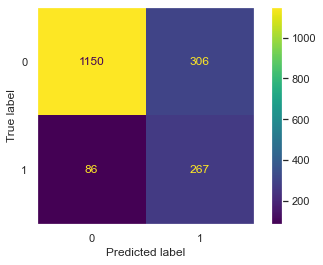

In [54]:
dict_models = batch_classify(features_downsampled, target_downsampled, features_valid, target_valid, no_classifiers = 1)
display_dict_models(dict_models)

Show_cf(features_downsampled, target_downsampled, features_valid, target_valid,dict_classifiers["Random Forest - sampled"])

**Вывод**

Модель явно сменила свои предпочтени я в сторону большего предвосхищения оттока клиентов. В результате сильно ухудшилось отпределение нулей, а по метрике ROC-AUC достигнуто меньшее значение чем при расширении выборки. 

### Оптимизация гипер-параметров

Мы теперь знаем, какая модель самая лучшая, но её можно улучшить ещё, за счёт оптимизации гипер-параметров.

In [55]:

n_estimators = [900,1000,1100]
max_depth = [2,7,15]
min_samples_split = [2,4,24]
min_samples_leaf = [2,4,7]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gs = GridSearchCV(model, param_grid, cv = 2, verbose = 5, n_jobs=-1)
gs.fit(features_upsampled, target_upsampled)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 900}

trained Random Forest - optimized in 6.77 s


,classifier,F1-score,roc_auc_score,train_time
0,Random Forest - optimized,0.850049,0.615603,6.766904


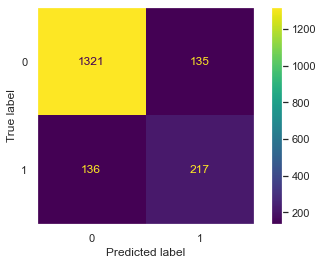

In [56]:
dict_classifiers = {
    "Random Forest - optimized": RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,n_estimators=1000, random_state=12345),
}
dict_models = batch_classify(features_upsampled, target_upsampled, features_valid, target_valid, no_classifiers = 1)
display_dict_models(dict_models)

Show_cf(features_upsampled, target_upsampled, features_valid, target_valid,dict_classifiers["Random Forest - optimized"])

## Тестирование модели

trained Random Forest - optimized in 6.84 s


,classifier,F1-score,roc_auc_score,train_time
0,Random Forest - optimized,0.848624,0.608451,6.835329


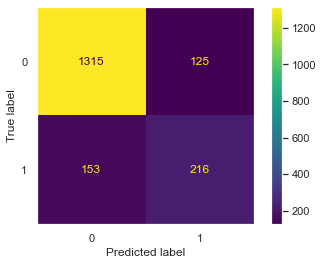

In [57]:
#Передадим в наши функции, показывающие качественные метрики обучающие и тестовые наборы данных
dict_models = batch_classify(features_upsampled, target_upsampled, features_test, target_test, no_classifiers = 1)
display_dict_models(dict_models)

Show_cf(features_upsampled, target_upsampled, features_test, target_test,dict_classifiers["Random Forest - optimized"])


Продолжим тест на адекватность и сравним показатель F1 с более прямолинейными моделями

In [58]:
str=["most_frequent", "prior", "stratified", "uniform"]
for i in str:
    dummy_clf = DummyClassifier(strategy=i)
    dummy_clf.fit(features_upsampled, target_upsampled)
    y_pred=dummy_clf.predict(features_upsampled)
    probabilities = dummy_clf.predict_proba(features_test)
    probabilities_one_valid = probabilities[:, 1]
    predictions=dummy_clf.predict(features_test)
    f1_= f1_score(target_test, predictions)
    roc_auc_ = roc_auc_score(target_test, probabilities_one_valid)
    print("Стратегия",i,"************************\n", "F1=",f1_,"ROC-AUC=" ,roc_auc_)

Стратегия most_frequent ************************
 F1= 0.33884297520661155 ROC-AUC= 0.5
Стратегия prior ************************
 F1= 0.33884297520661155 ROC-AUC= 0.5
Стратегия stratified ************************
 F1= 0.3115264797507788 ROC-AUC= 0.4840362466124662
Стратегия uniform ************************
 F1= 0.2997582594681708 ROC-AUC= 0.5


**ВЫВОД**

1. Нами был исслоедован датасет, заполнены пропуски и устранены самые явные выбросы.
2. Была определна модель, дающаяя высокие значения показателя F1 на данных, без учёта дисбаланса классов.
3. Были применены три метода борьбы с дисбалансом классов, увеличение выборки показало себя с лучшей стороны.
4. Оптимизация гипер-параметров не дала особенного прироста в качестве предстказаний.


В результате нам удалось получить модель значительно превосходящую целевой параметр по F1, которая имеет лучшую предсказательную силу **на тестовой выборке**, чем все прямолинейные алгоритмы. Вместе с тем, он не намного лучше, процентов на 10% в том, что касается ROC-AUC.

*Матрица ошибок на тестовой выборке свидетелсьвует о том, что модель хорошо научилась угадывать клиентов, покидающих банк, но по тем, которые пока остались, ошибается примерно в половине случаев. Если запустить её в промышленную эксплуатацию, то возможно Банк будет излишне навязчив с теми клиентами, которых и так всё устраивает. Но, скорее всего, это будет также работать на их удержание, что обозначено как основная проблема.*